# Plot Posteriors

This notebook uses the public code to plot the posterior distributions from MultiSWAG and pyDelfi

In [1]:
import sys
import torch
import numpy as np
import getdist.plots
from getdist.mcsamples import loadMCSamples
sys.path.append("../cosmoswag") 
from swag import SWAGModel
from cmb_simulator import *
from data_object import read_data

### Load the data and parameters

In [2]:
data = read_data()
data.read_truth(filename="simulated_truth.txt")
x_train, y_train, x_val, y_val = data.get_data()
delta_x = data.get_error()
truth = data.get_truth()

### Load the multiSWAG model and generate samples

In [3]:
nin = x_val.shape[1]
npars = y_val.shape[1]
model = SWAGModel(nin=nin, npars = npars)
model.load("cmb_noisy.pt")

samples = model.generate_samples(x_val[:10], nsamples=1000, scale=.5, verbose=True, delta_x = delta_x)

Generated 100 samples.
Generated 200 samples.
Generated 300 samples.
Generated 400 samples.
Generated 500 samples.
Generated 600 samples.
Generated 700 samples.
Generated 800 samples.
Generated 900 samples.


### Convert to GetDist for plotting

In [4]:
ind = -3 # Which of the validation simulations to use
samples_cosmo = data.unnormalize_params(samples[:,ind]).detach().numpy()
names = ["H0", "ombh2",  "omch2", "logA", "ns"]
labels =  ["H_0", "\Omega_\mathrm{b} h^2", "\Omega_\mathrm{c} h^2", "\log A", "n_s"]
swag = getdist.MCSamples(samples=samples_cosmo,names = names, labels = labels)
params = data.unnormalize_params(y_val[:10]).detach().numpy()

Removed no burn in


### Generate plots

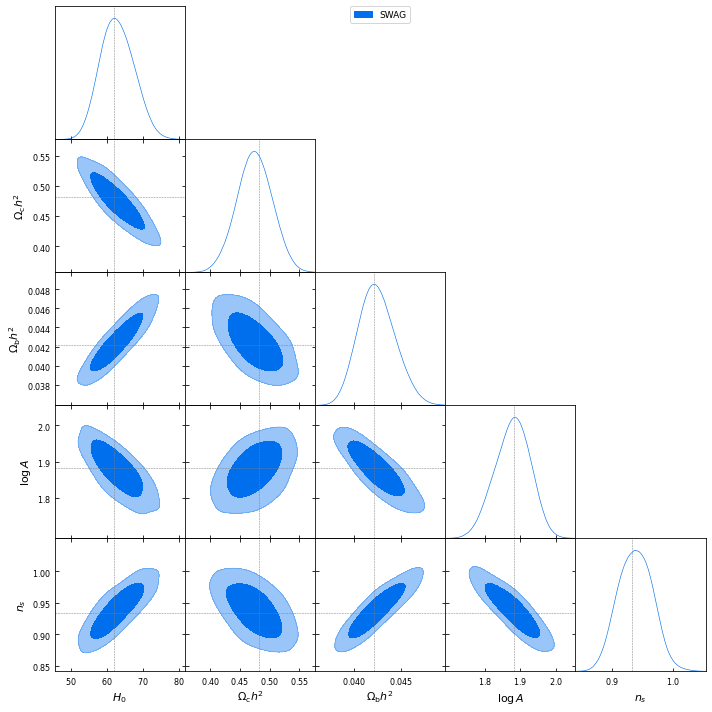

In [5]:
g = getdist.plots.getSubplotPlotter()
g.triangle_plot([swag], 
                ["H0", "omch2",  "ombh2", "logA", "ns"], 
                filled=True,
                legend_labels = ['SWAG'],
                markers={'H0':params[ind,0],
                         'ombh2':params[ind,1],
                         'omch2':params[ind,2],
                         'logA':params[ind,3],
                         'ns':params[ind,4]}
               )

# Comparison with CAMB

First, generate samples for the true data

In [6]:
samples = model.generate_samples(truth, nsamples=1000, scale=.5, verbose=True, delta_x = delta_x)

Generated 100 samples.
Generated 200 samples.
Generated 300 samples.
Generated 400 samples.
Generated 500 samples.
Generated 600 samples.
Generated 700 samples.
Generated 800 samples.
Generated 900 samples.


In [7]:
samples_cosmo = data.unnormalize_params(samples[:,0]).detach().numpy()
swag = getdist.MCSamples(samples=samples_cosmo,names = names, labels = labels)

Removed no burn in


Load the CAMB samples

In [8]:
trueSamples = loadMCSamples("../cobaya/chains/sim")

../cobaya/chains/sim.1.txt
Removed no burn in


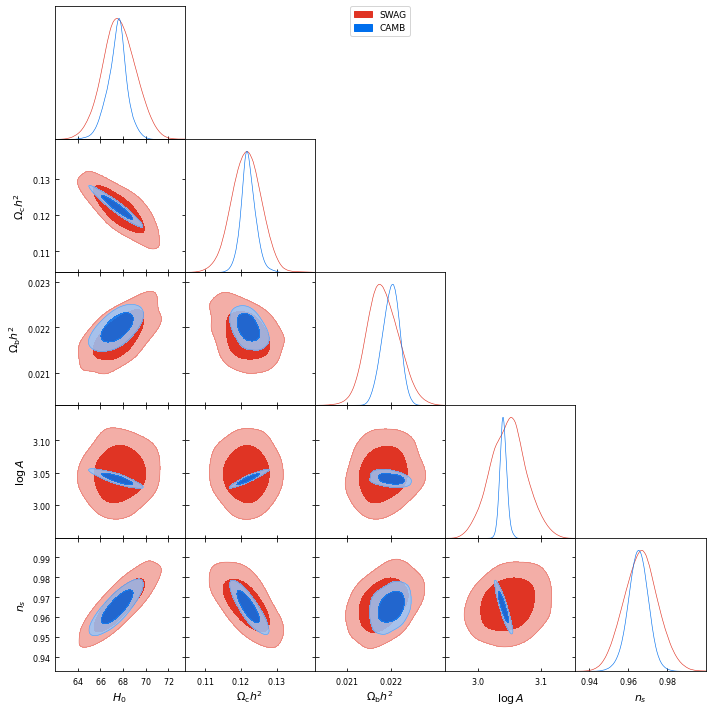

In [9]:
g = getdist.plots.getSubplotPlotter()
g.triangle_plot([swag, trueSamples], 
                ["H0", "omch2",  "ombh2", "logA", "ns"], 
                filled=True,
                legend_labels = ['SWAG', 'CAMB'],
               )